## 1. Importing Libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.simplefilter("ignore")

**Setting the style**

In [93]:
sn.set_style('darkgrid')

**Loading the csv files**

In [3]:
df=pd.read_csv('/kaggle/input/spotify-data/data (1).csv')

# Dropping the unnamed column
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

**Showing the first five rows**

In [4]:
df.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   

   target      song_title            artist  
0       1        Mask Off            Future  
1       1         Redbone  Childish Gambino  
2       1    Xanny Family            Future  
3       1  Master Of None       Beach House  
4       1  Parallel Lines       Junior Boys

**Showing the dataset shape**

In [5]:
df.shape

(2017, 16)

Showing the dataset columns

In [6]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

**Showing the total information about the dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

**Checking the null values**

In [8]:
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

**Total number of columns**

In [9]:
len(df.columns)

16

In [10]:
df['target'].value_counts()

target
1    1020
0     997
Name: count, dtype: int64

**Some statistical features**

In [16]:
df.describe()

acousticness  danceability   duration_ms       energy  \
count   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean       0.187590      0.618422  2.463062e+05     0.681577   
std        0.259989      0.161029  8.198181e+04     0.210273   
min        0.000003      0.122000  1.604200e+04     0.014800   
25%        0.009630      0.514000  2.000150e+05     0.563000   
50%        0.063300      0.631000  2.292610e+05     0.715000   
75%        0.265000      0.738000  2.703330e+05     0.846000   
max        0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

---

## 2. Exploratory Data Analysis 📊📉

## a) Showing the distributions

array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

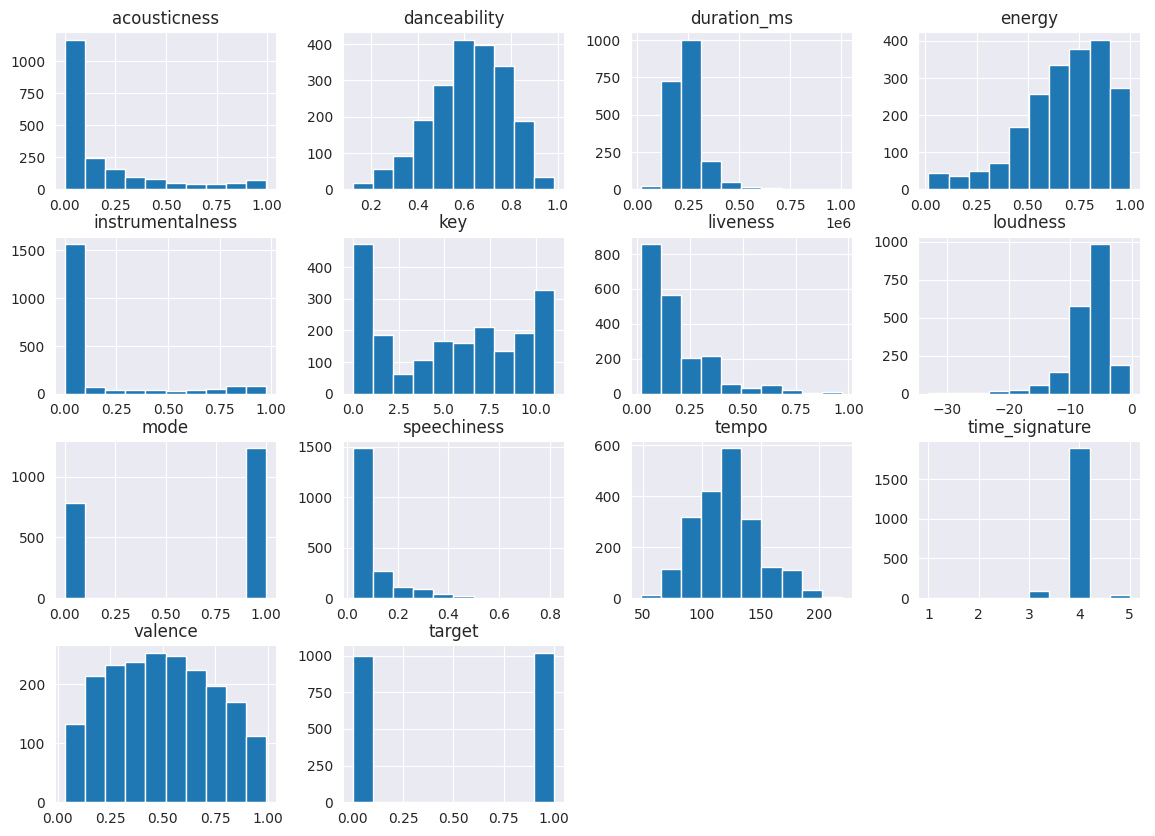

In [18]:
df.hist(figsize=(14,10))

----

## b) Pairplot

<Figure size 700x600 with 0 Axes>

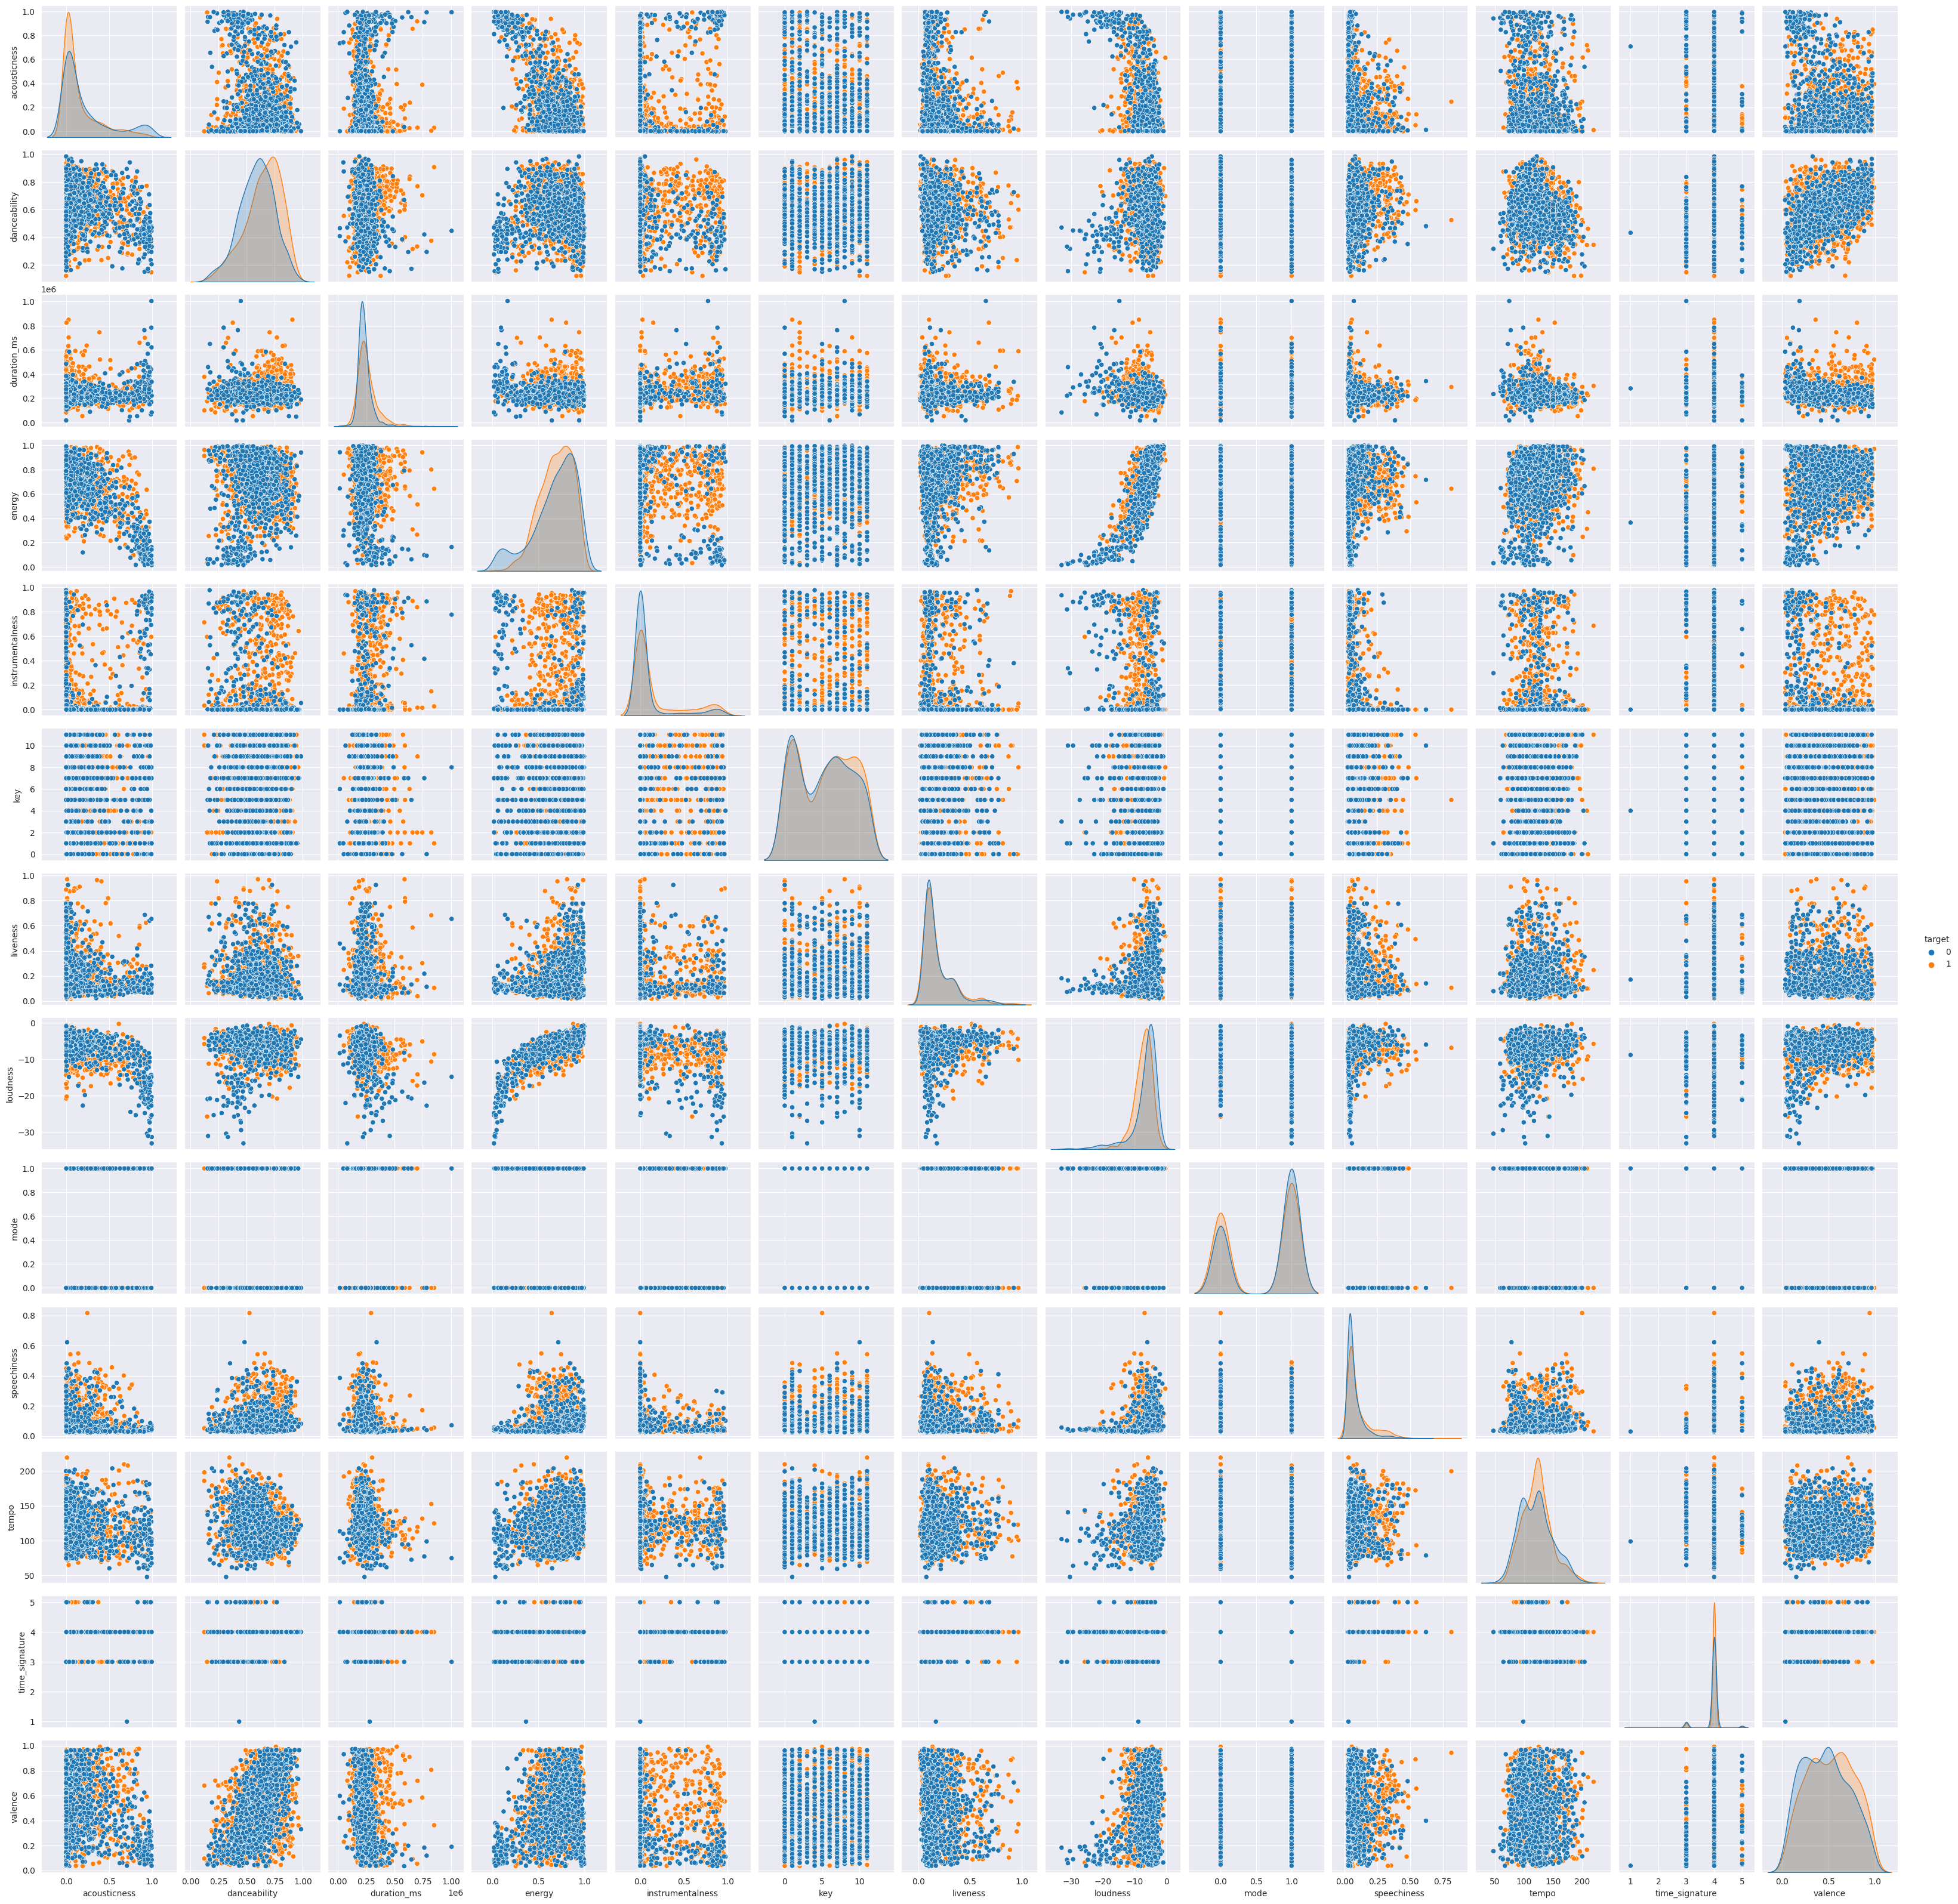

In [13]:
plt.figure(figsize=(7,6))

sn.pairplot(data=df, hue='target')

----

## c) Top 10 most popular artist

In [19]:
top_10_artist=df.groupby('artist').count().sort_values(by='song_title', ascending=False)['song_title'][:10]
top_10_artist

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
FIDLAR              9
Crystal Castles     9
*NSYNC              8
Fall Out Boy        8
Michael Jackson     8
Name: song_title, dtype: int64

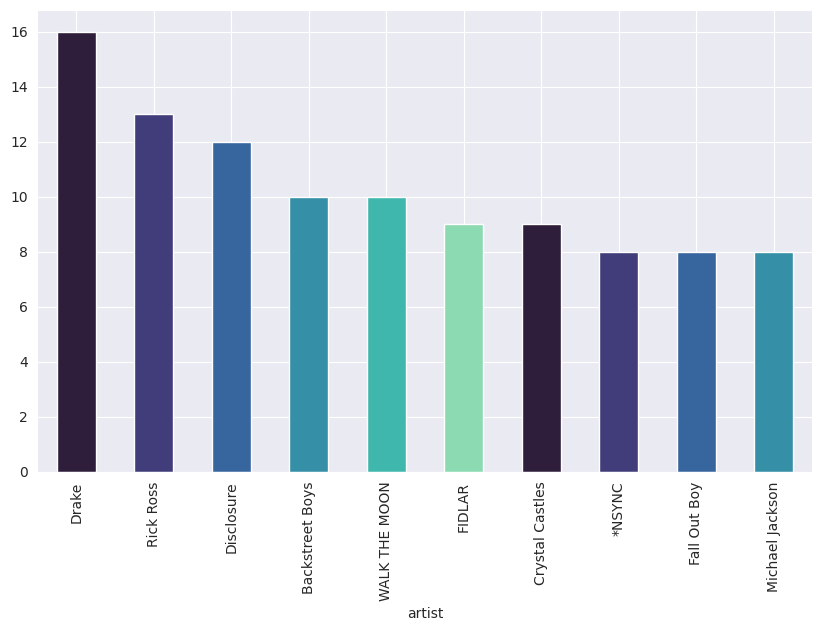

In [27]:
top_10_artist.plot.bar(figsize=(10,6), color=sn.color_palette('mako'))
plt.show()

----

## d) Top 5 loudest Track

In [23]:
loud_10_track=df[['loudness', 'song_title']].sort_values(by='loudness', ascending=True)[:10]
loud_10_track

loudness                                         song_title
1594   -33.097            Lyric Pieces, Book I Op. 12: I. Arietta
1596   -31.367            8 Fantasiestücke, Op.12 : 1. Des Abends
1598   -31.082  Piano Quartet in E flat, Op.47: 3. Andante can...
1531   -30.447          I Was So Young, and You Were So Beautiful
1549   -29.460                                            Eleanor
1571   -27.350                   I Got It Bad And That Ain't Good
1541   -26.924                                  Two Sleepy People
1546   -25.766                                     Almas vaggvisa
817    -25.756  Mozart: Requiem in D Minor, K. 626: VIII. Lacr...
1537   -25.358                                      Blue in Green

Text(0.5, 1.0, 'Top 10 loudest Track')

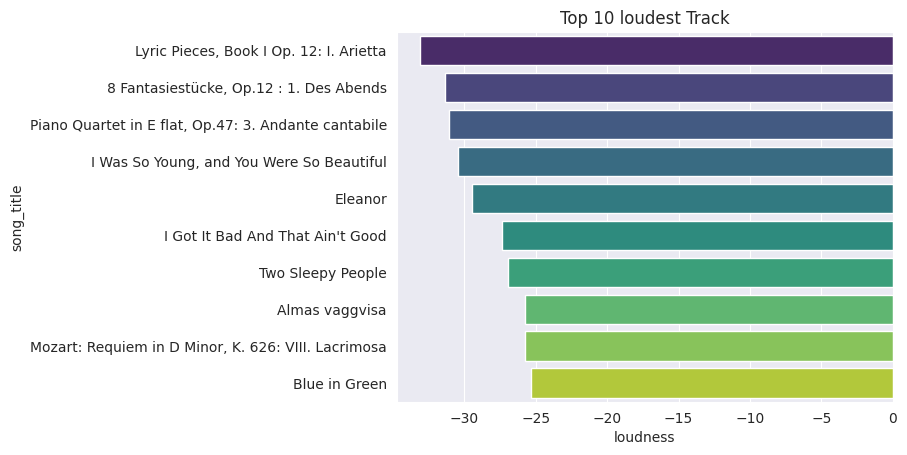

In [28]:
sn.barplot(x='loudness', y='song_title', data=loud_10_track, palette='viridis')

plt.title('Top 10 loudest Track')

----

## e) Artist with most dancability song

In [35]:
dance_song=df[['danceability','artist']].sort_values(by='danceability', ascending=True)[:10]
dance_song

danceability                     artist
729          0.122           Destruction Unit
532          0.123                     FIDLAR
817          0.148       Nikolaus Harnoncourt
1600         0.152  Carl Philipp Emanuel Bach
1598         0.156            Robert Schumann
522          0.162                        M83
1348         0.162                     Brojob
1464         0.164              Keys N Krates
1313         0.170         Signs of the Swarm
1306         0.173        Altered Perceptions

Text(0.5, 1.0, 'Artist with most dancability song')

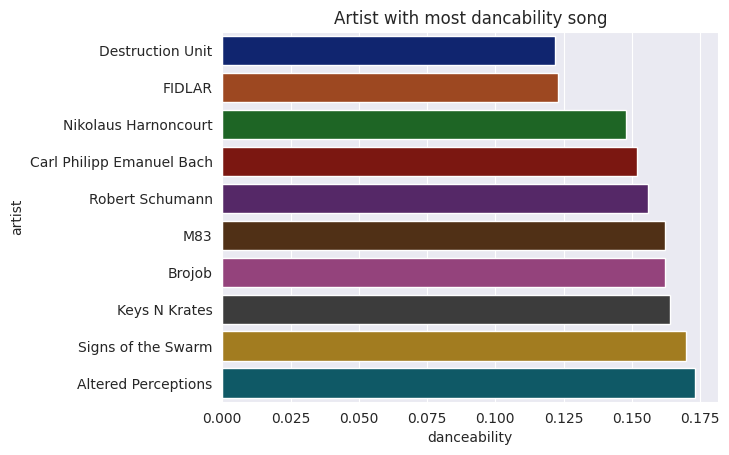

In [40]:
sn.barplot(x='danceability',y='artist', data=dance_song, palette='dark')

plt.title('Artist with most dancability song')

-----

## f) Artist with most energetic song

In [69]:
df5=df[['artist','energy']].sort_values(by='energy', ascending=False)[:60]

<Axes: xlabel='energy', ylabel='artist'>

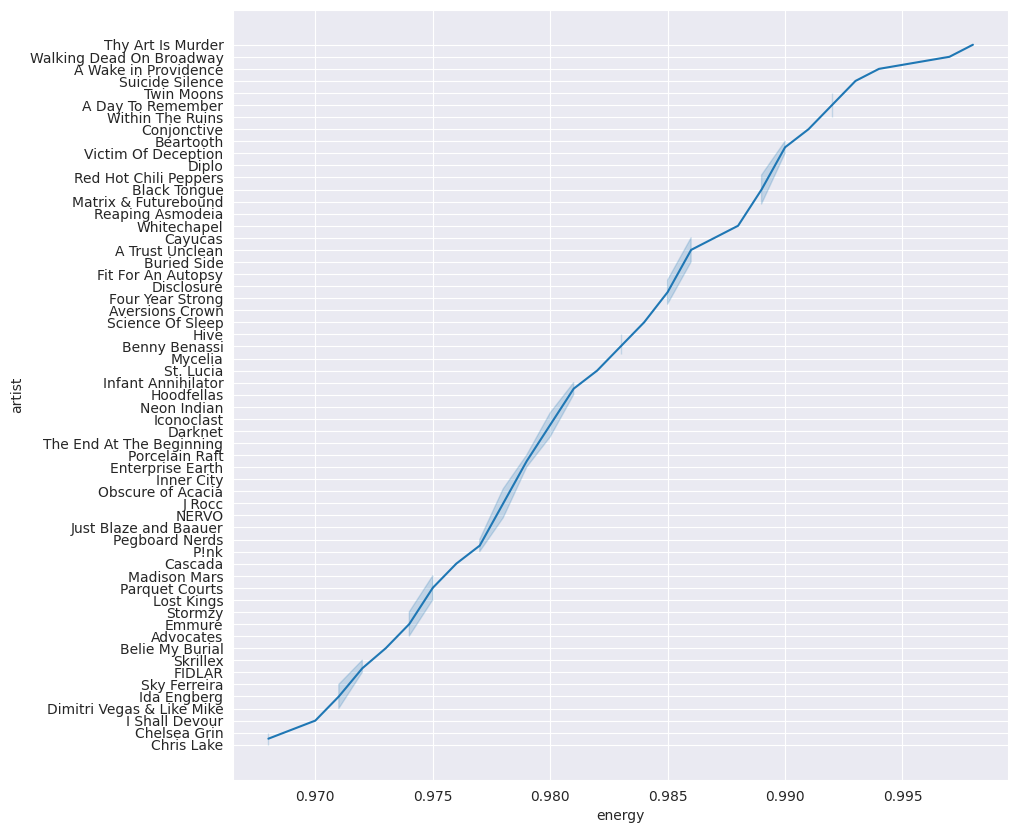

In [70]:
plt.figure(figsize=(10,10))
sn.lineplot(x='energy', y='artist', data=df5)

----

## g) Top 10 Accoustic Songs

In [88]:
df6=df[['artist','acousticness', 'song_title']].sort_values(by='acousticness', ascending=False)[:10]
df6

artist  acousticness  \
1594          Edvard Grieg         0.995   
1596       Robert Schumann         0.995   
1876       Frédéric Chopin         0.994   
1599        Franz Schubert         0.993   
1535         Joshua Redman         0.992   
1603     Felix Mendelssohn         0.991   
817   Nikolaus Harnoncourt         0.990   
1538       Wynton Marsalis         0.990   
1528     Enrico Pieranunzi         0.988   
1530      Passport Quartet         0.986   

                                             song_title  
1594            Lyric Pieces, Book I Op. 12: I. Arietta  
1596            8 Fantasiestücke, Op.12 : 1. Des Abends  
1876           Nocturne No.1 In B Flat Minor, Op.9 No.1  
1599  Piano Sonata No. 18 in G Major, Op. 78, D. 894...  
1535                                The Nearness of You  
1603  Viola Sonata in C Minor: III. Andante con vari...  
817   Mozart: Requiem in D Minor, K. 626: VIII. Lacr...  
1538                                      Where or When  
1528                                       I Got It Bad  
1530                             I'm a Fool to Want You

<Axes: xlabel='acousticness', ylabel='artist'>

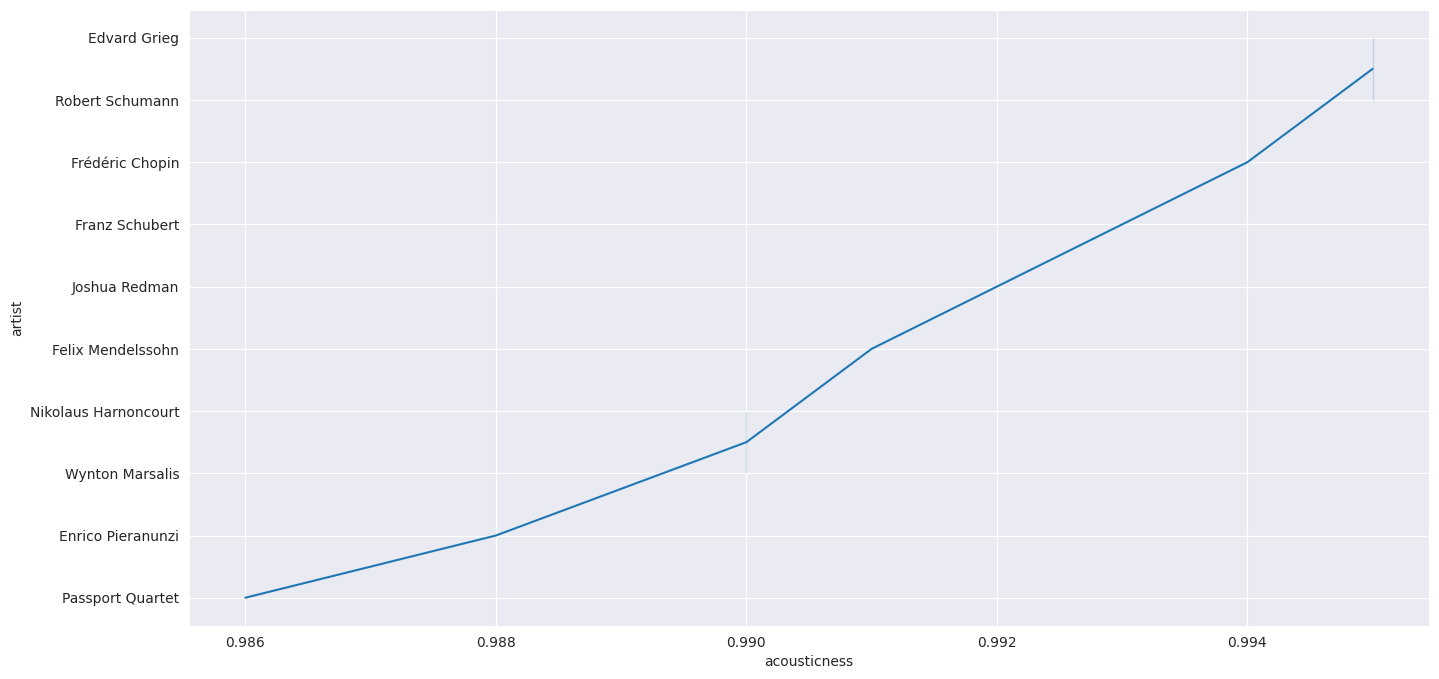

In [91]:
plt.figure(figsize=(16,8))
sn.lineplot(x='acousticness',y='artist', data=df6)

----

## h) Top 10 instrumental tracks

In [42]:
ins=df[['instrumentalness','artist','song_title']].sort_values(by='instrumentalness', ascending=False)[:10]
ins

instrumentalness                    artist  \
1313             0.976        Signs of the Swarm   
271              0.968               Prince Rama   
1575             0.964                Ray Bryant   
1619             0.958             John Dahlbäck   
725              0.957                Todd Terje   
1546             0.956         Jan Lundgren Trio   
1322             0.955  Walking Dead On Broadway   
1349             0.954           Aversions Crown   
1661             0.954               Mark Knight   
121              0.952                Bassnectar   

                                song_title  
1313                       Senseless Order  
271   So Destroyed (channeling Rage Peace)  
1575             A Hundred Dreams from Now  
1619                                 Raven  
725                      Strandbar (disko)  
1546                        Almas vaggvisa  
1322                            Pitchblack  
1349                       Prismatic Abyss  
1661                               Yebisah  
121                         Chasing Heaven

Text(0.5, 1.0, 'Top 10 instrumental tracks')

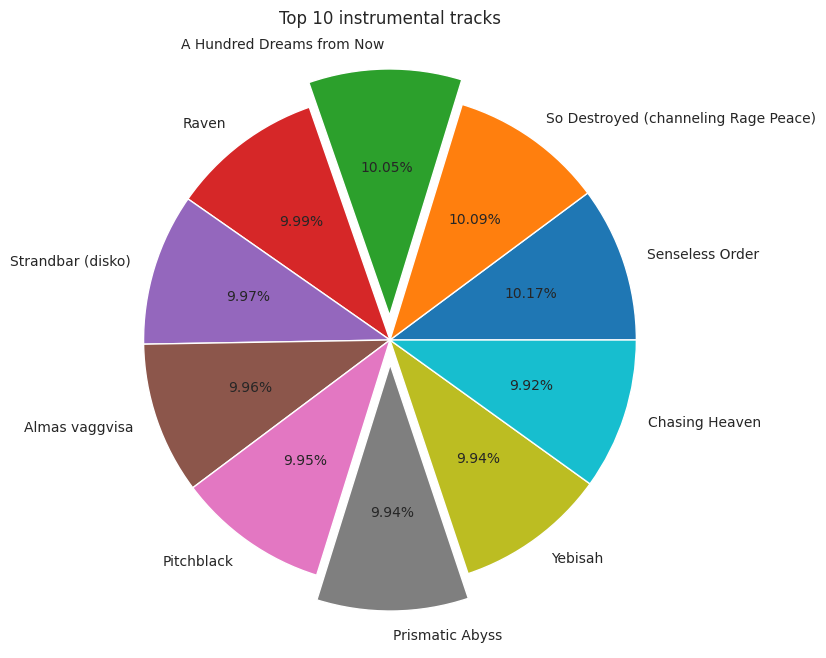

In [50]:
plt.figure(figsize=(10,8))
plt.pie(x='instrumentalness', data=ins,labels=ins.song_title, autopct="%.2f%%", explode=[0,0,0.1,0,0,0,0,0.1,0,0])

plt.title('Top 10 instrumental tracks')

----

## i) Multiple feature Plots

In [51]:
int_feature_cols=['tempo','loudness','acousticness','danceability','duration_ms','energy',
                  'instrumentalness','liveness','speechiness','valence']

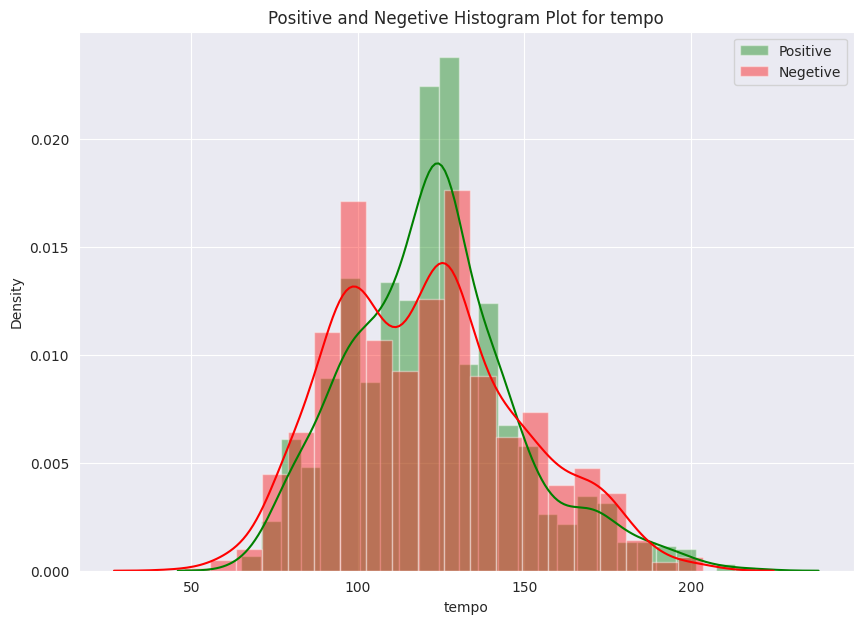

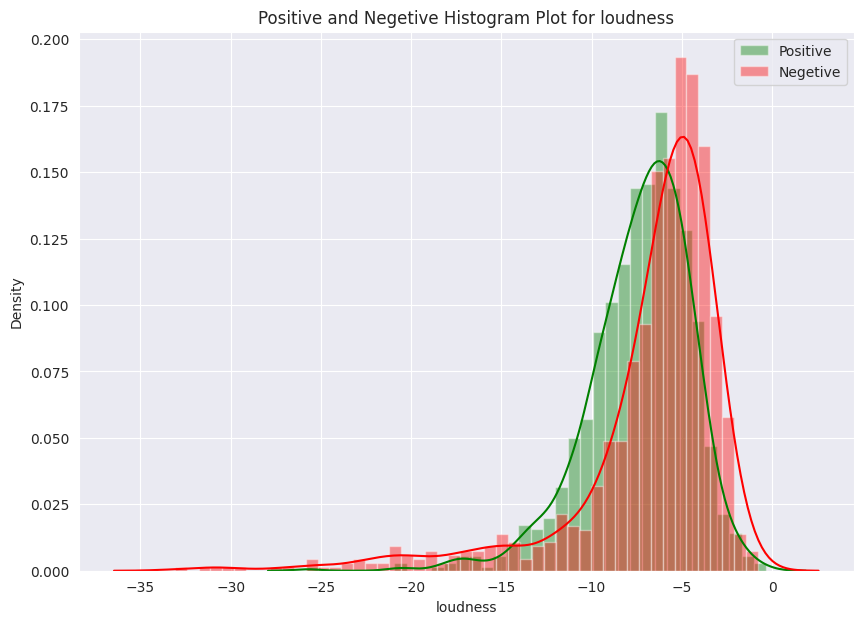

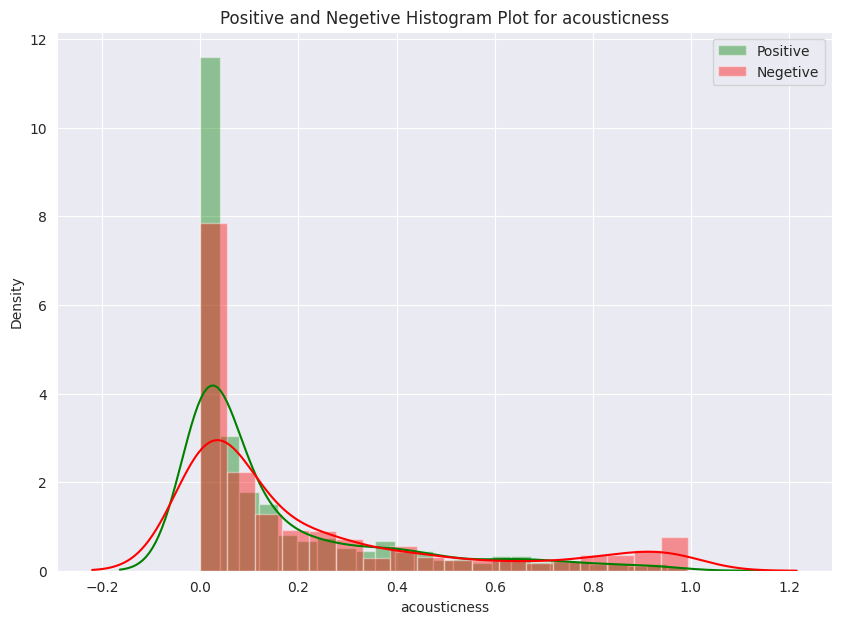

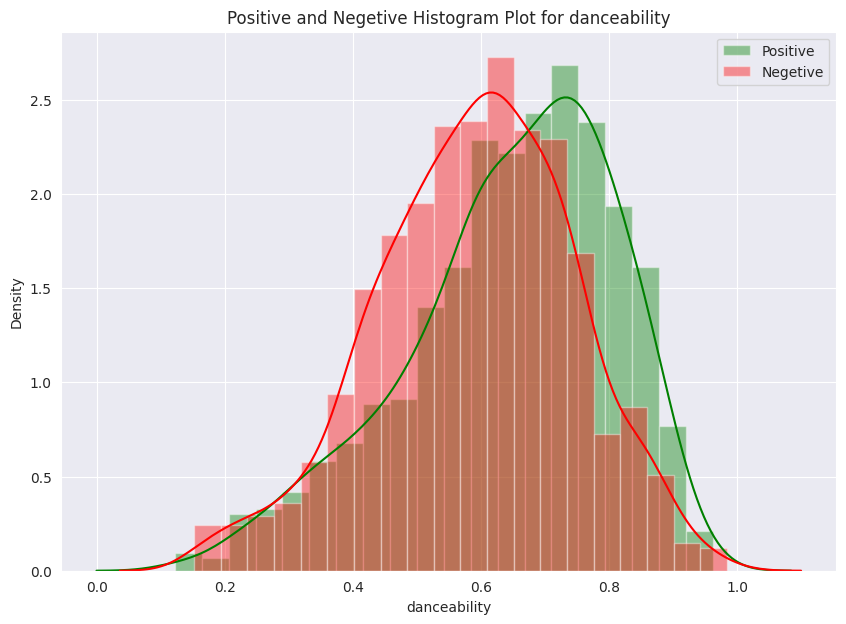

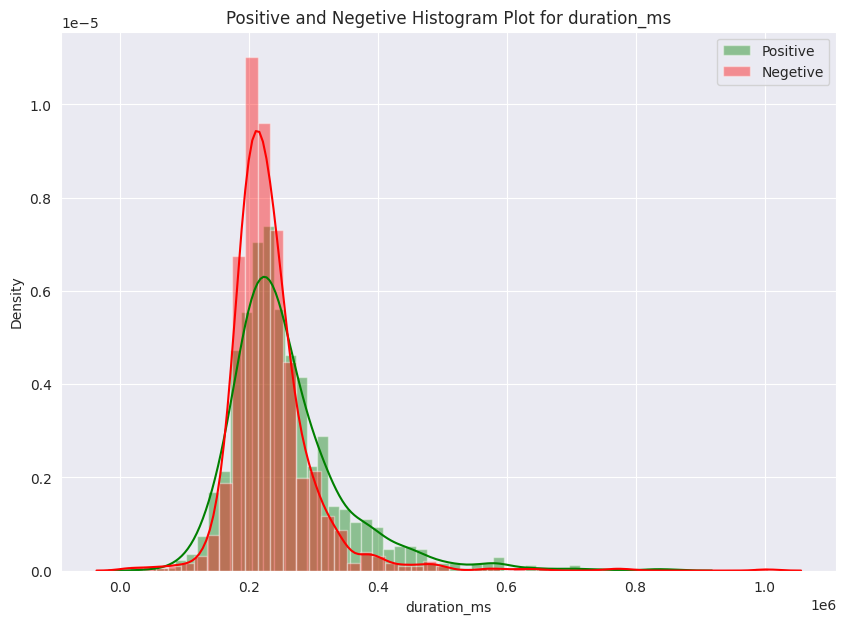

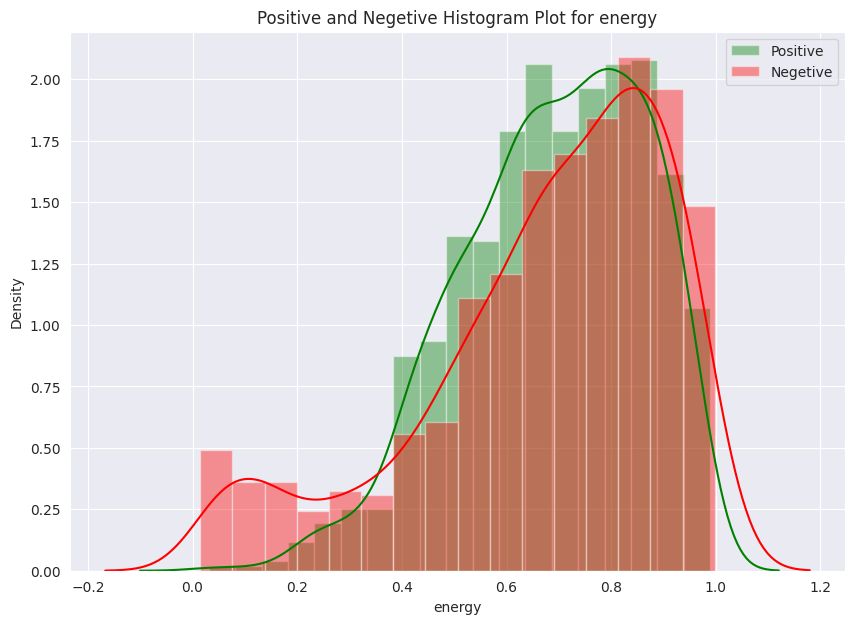

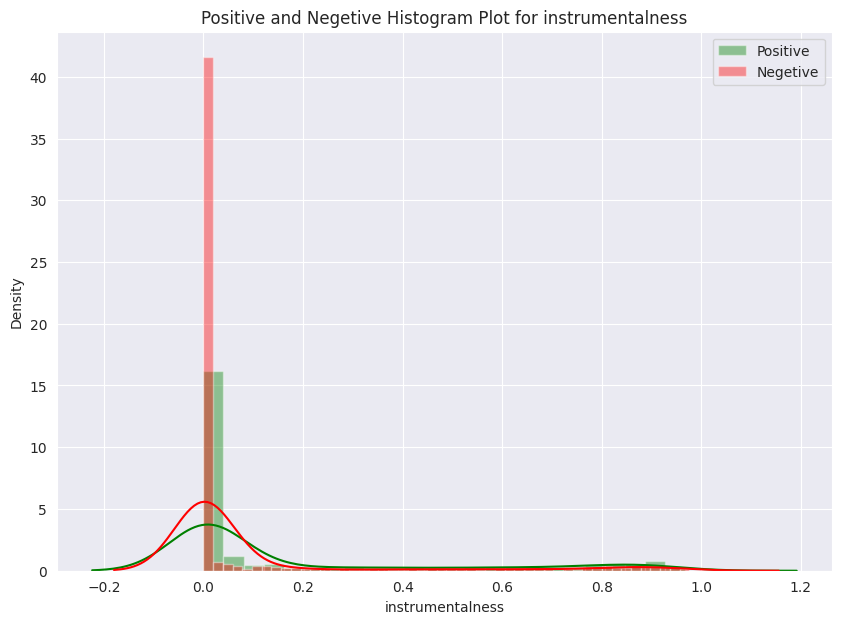

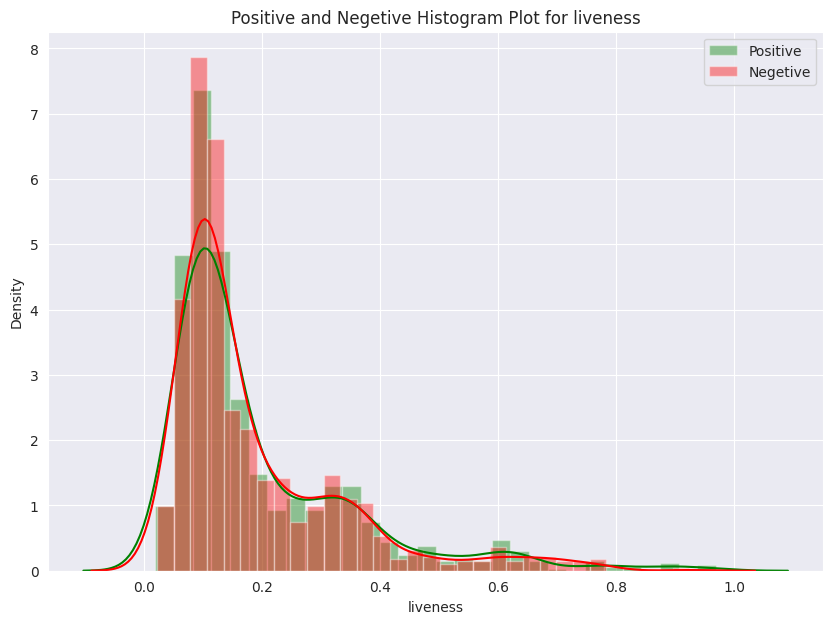

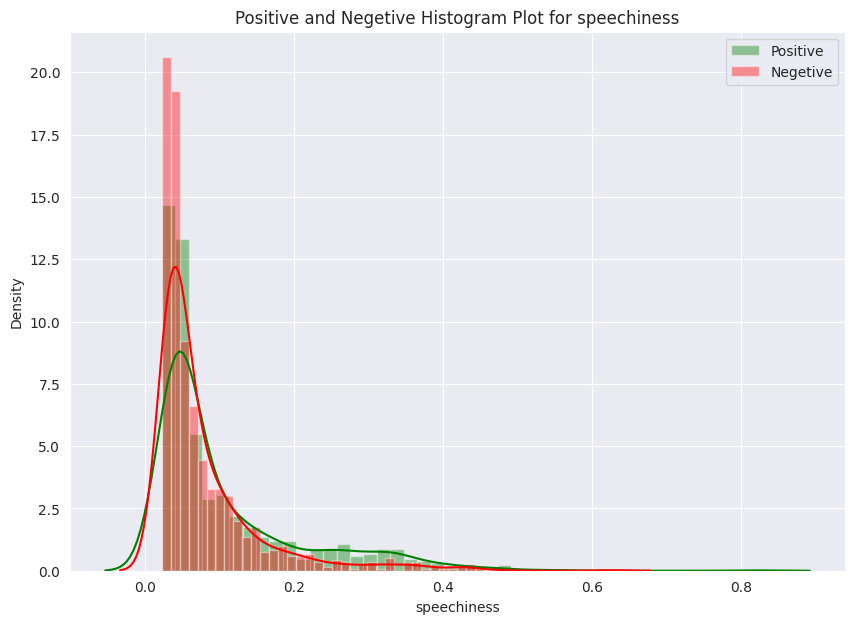

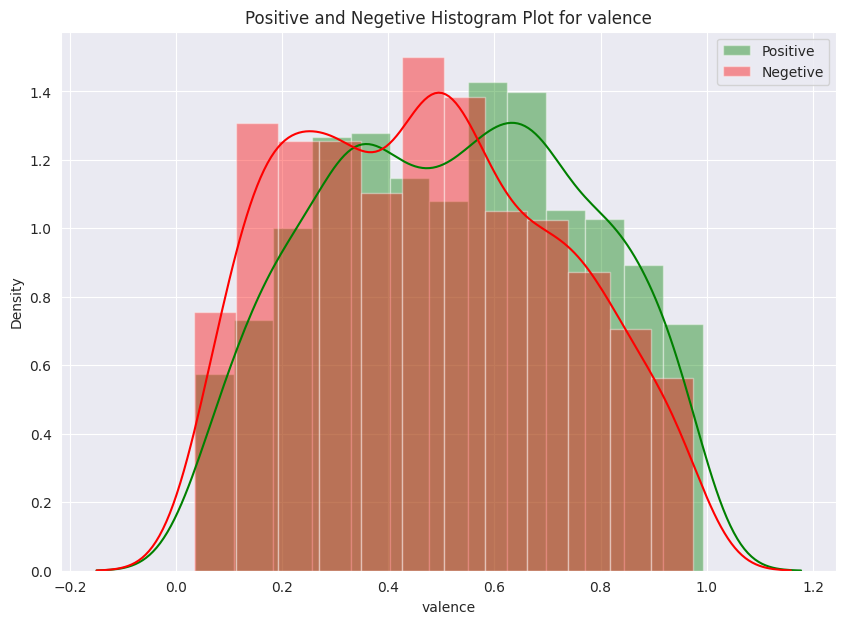

In [52]:
for feature_col in int_feature_cols:
  pos_data=df[df['target']==1][feature_col]
  neg_data=df[df['target']==0][feature_col]

  plt.figure(figsize=(10,7))
  sn.distplot(pos_data, label='Positive', color='green')
  sn.distplot(neg_data, label='Negetive', color='red')

  plt.legend(loc='upper right')
  plt.title(f"Positive and Negetive Histogram Plot for {feature_col}")
  plt.show()

---

## j) Liked Unliked song distribution Pie-chart

In [31]:
df['target'].value_counts()

target
1    1020
0     997
Name: count, dtype: int64

In [32]:
labels=['liked songs', 'disliked songs']
values=df['target'].value_counts().tolist()

px.pie(df, values=values, names=labels, title='Liked vs Disliked Analysis')

----

## k) Top 20 artists

In [33]:
values = df['artist'].value_counts().tolist()[:20]
names = list(dict(df['artist'].value_counts()).keys())[:20]

fig = go.Bar(x = names,
             y = values,
             marker = dict(color = 'rgba(30, 215, 96, 0.75)',
                         line=dict(color='rgb(25, 20, 20)',width=1.5)))

layout = go.Layout()


fig = go.Figure(data = fig, layout = layout)
fig.update_layout(title_text='Top Artists')
fig.show()

----

## l) Scatterplots

### Visualizing all of the columns with respect to energy column

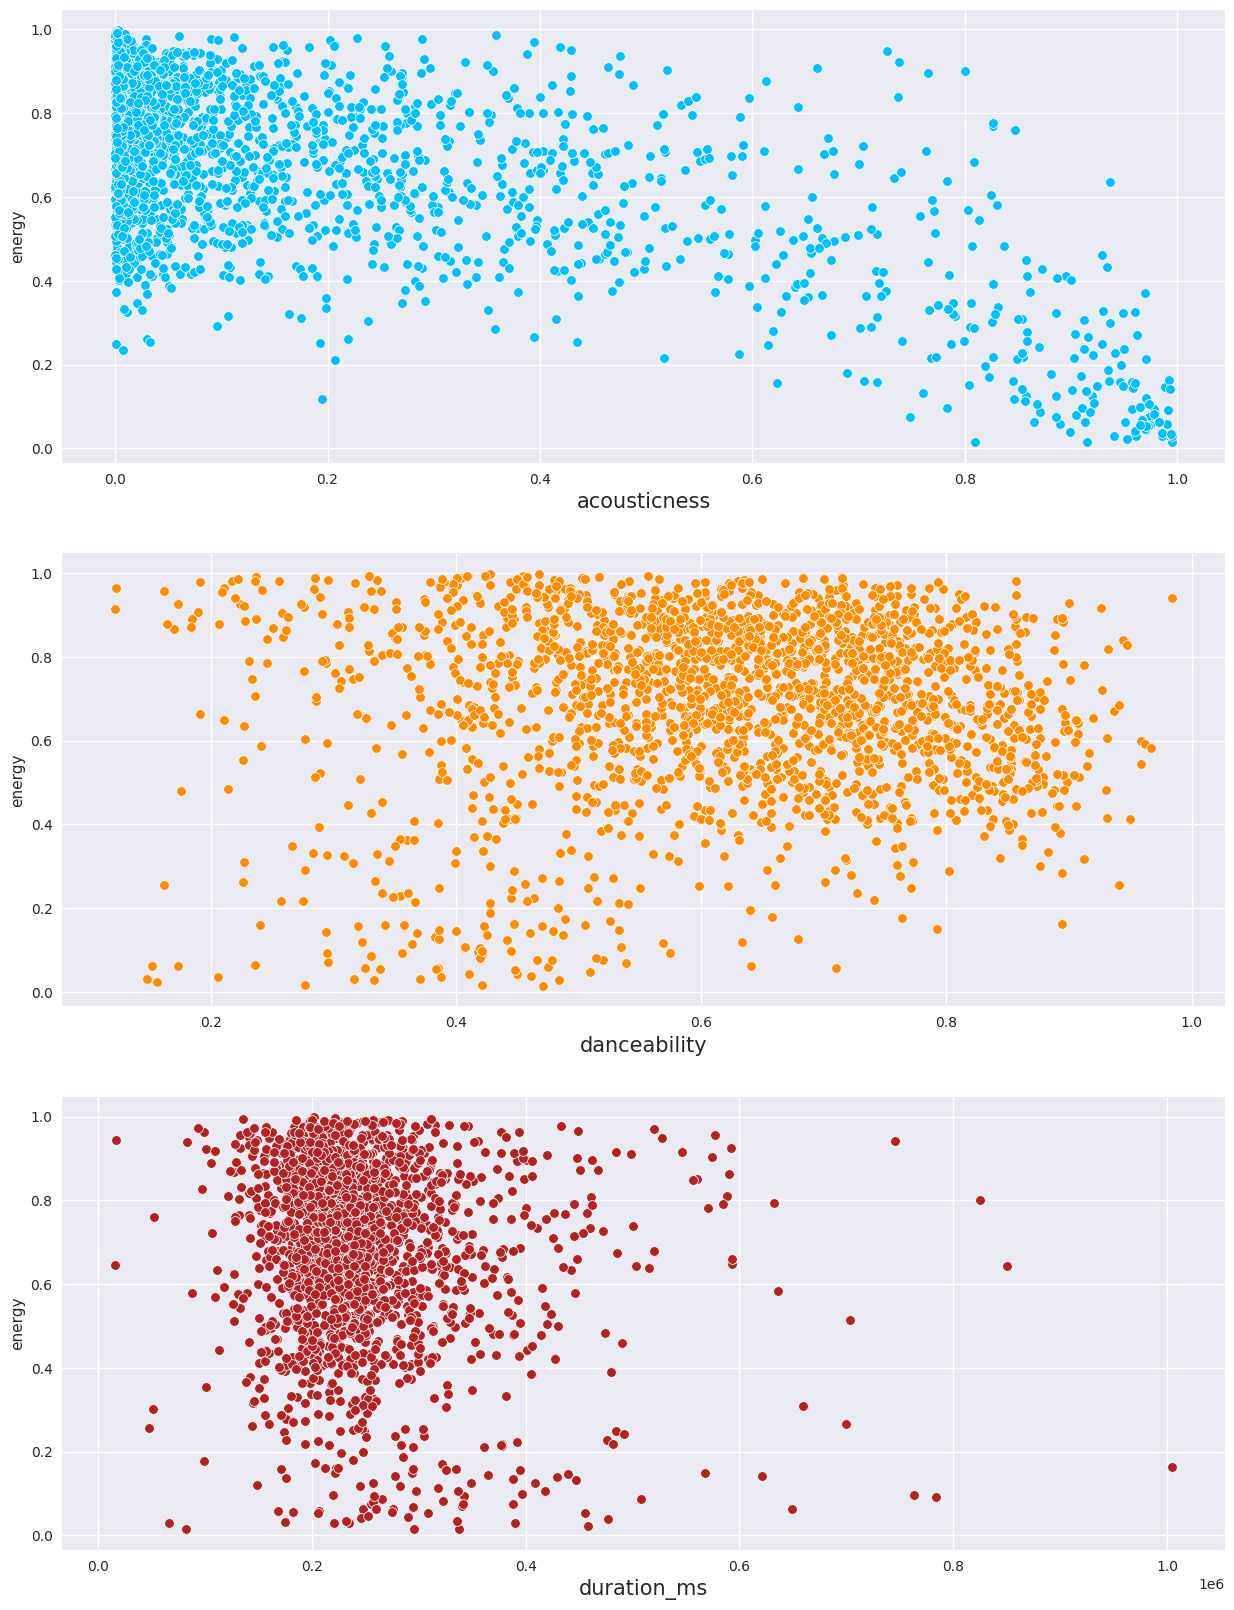

In [34]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,20))

sn.scatterplot(x = df['acousticness'], y = df['energy'], ax=ax[0], color="deepskyblue");
ax[0].set_xlabel("acousticness",fontsize=15);

sn.scatterplot(x = df['danceability'], y = df['energy'], ax=ax[1], color="darkorange");
ax[1].set_xlabel("danceability",fontsize=15);

sn.scatterplot(x = df['duration_ms'], y = df['energy'], ax=ax[2], color="firebrick");
ax[2].set_xlabel("duration_ms",fontsize=15);

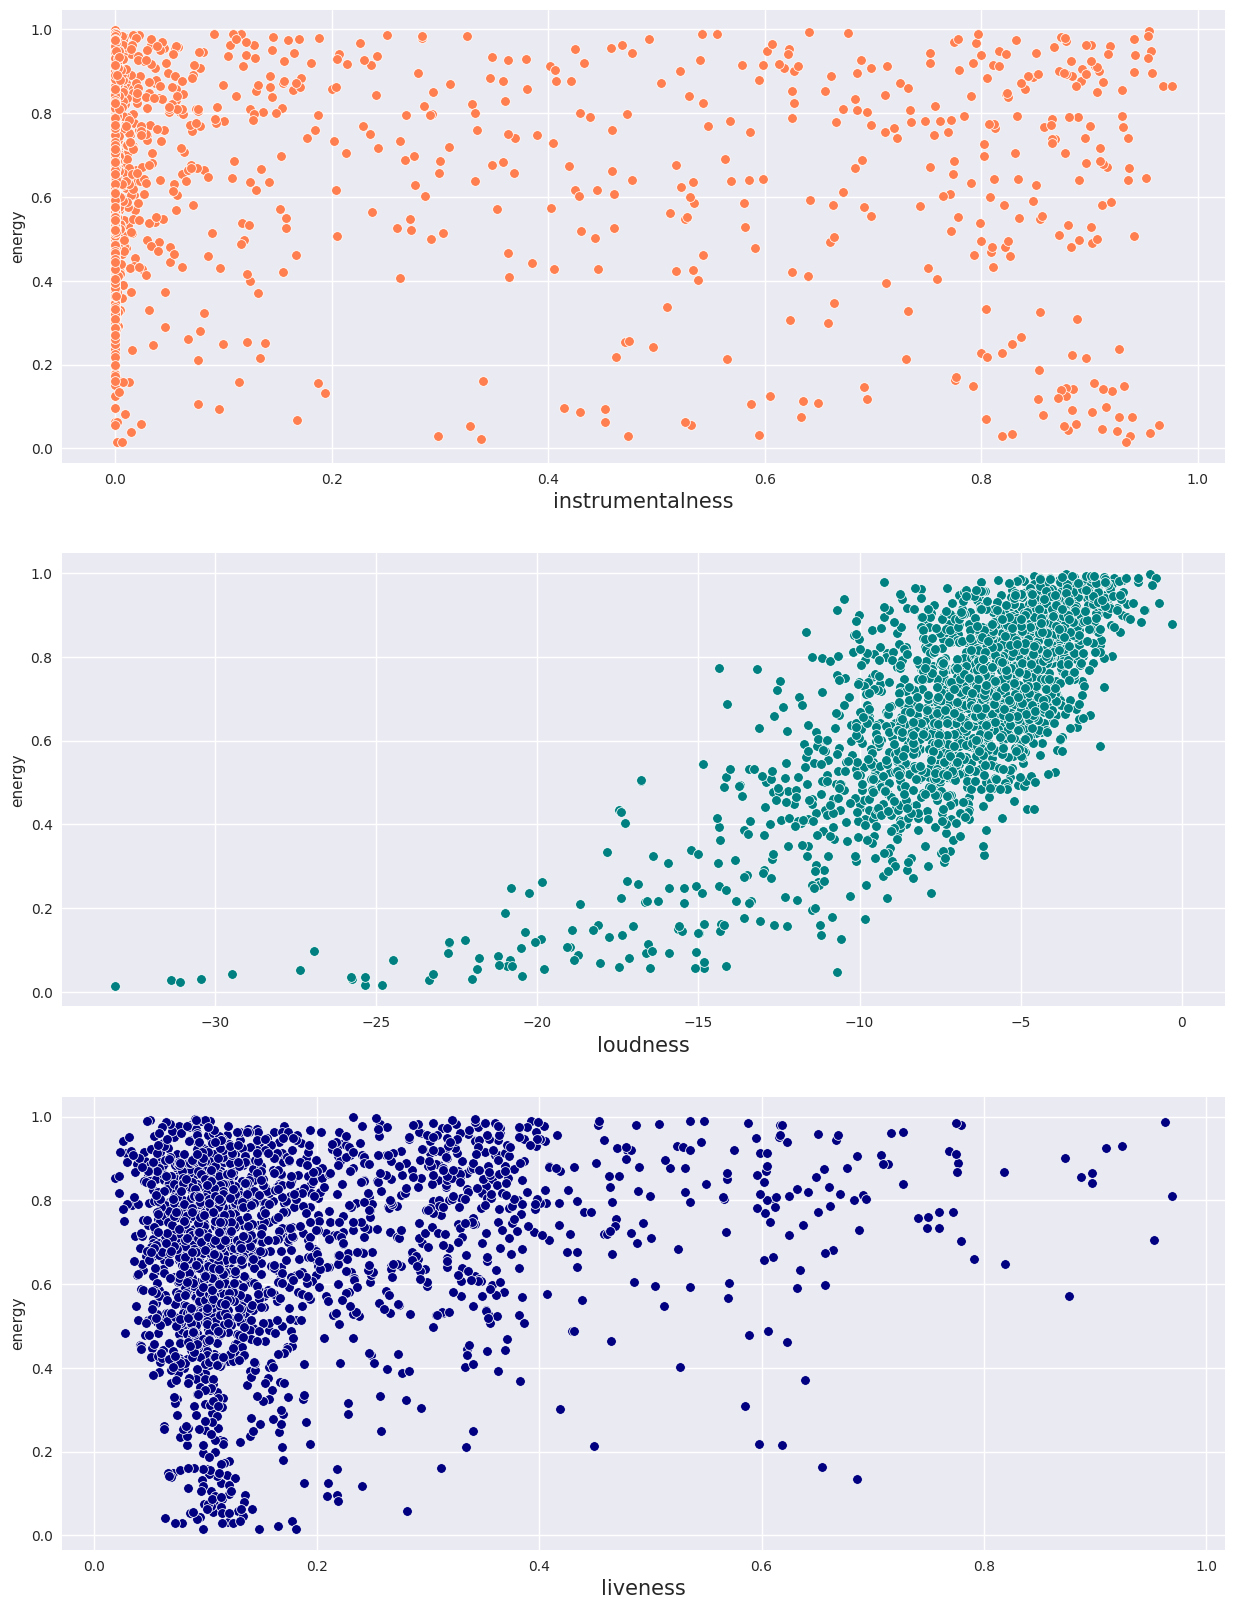

In [35]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,20))

sn.scatterplot(x = df['instrumentalness'], y = df['energy'], ax=ax[0], color="coral");
ax[0].set_xlabel("instrumentalness",fontsize=15);

sn.scatterplot(x = df['loudness'], y = df['energy'], ax=ax[1], color="teal");
ax[1].set_xlabel("loudness",fontsize=15);

sn.scatterplot(x = df['liveness'], y = df['energy'], ax=ax[2], color="navy");
ax[2].set_xlabel("liveness",fontsize=15);

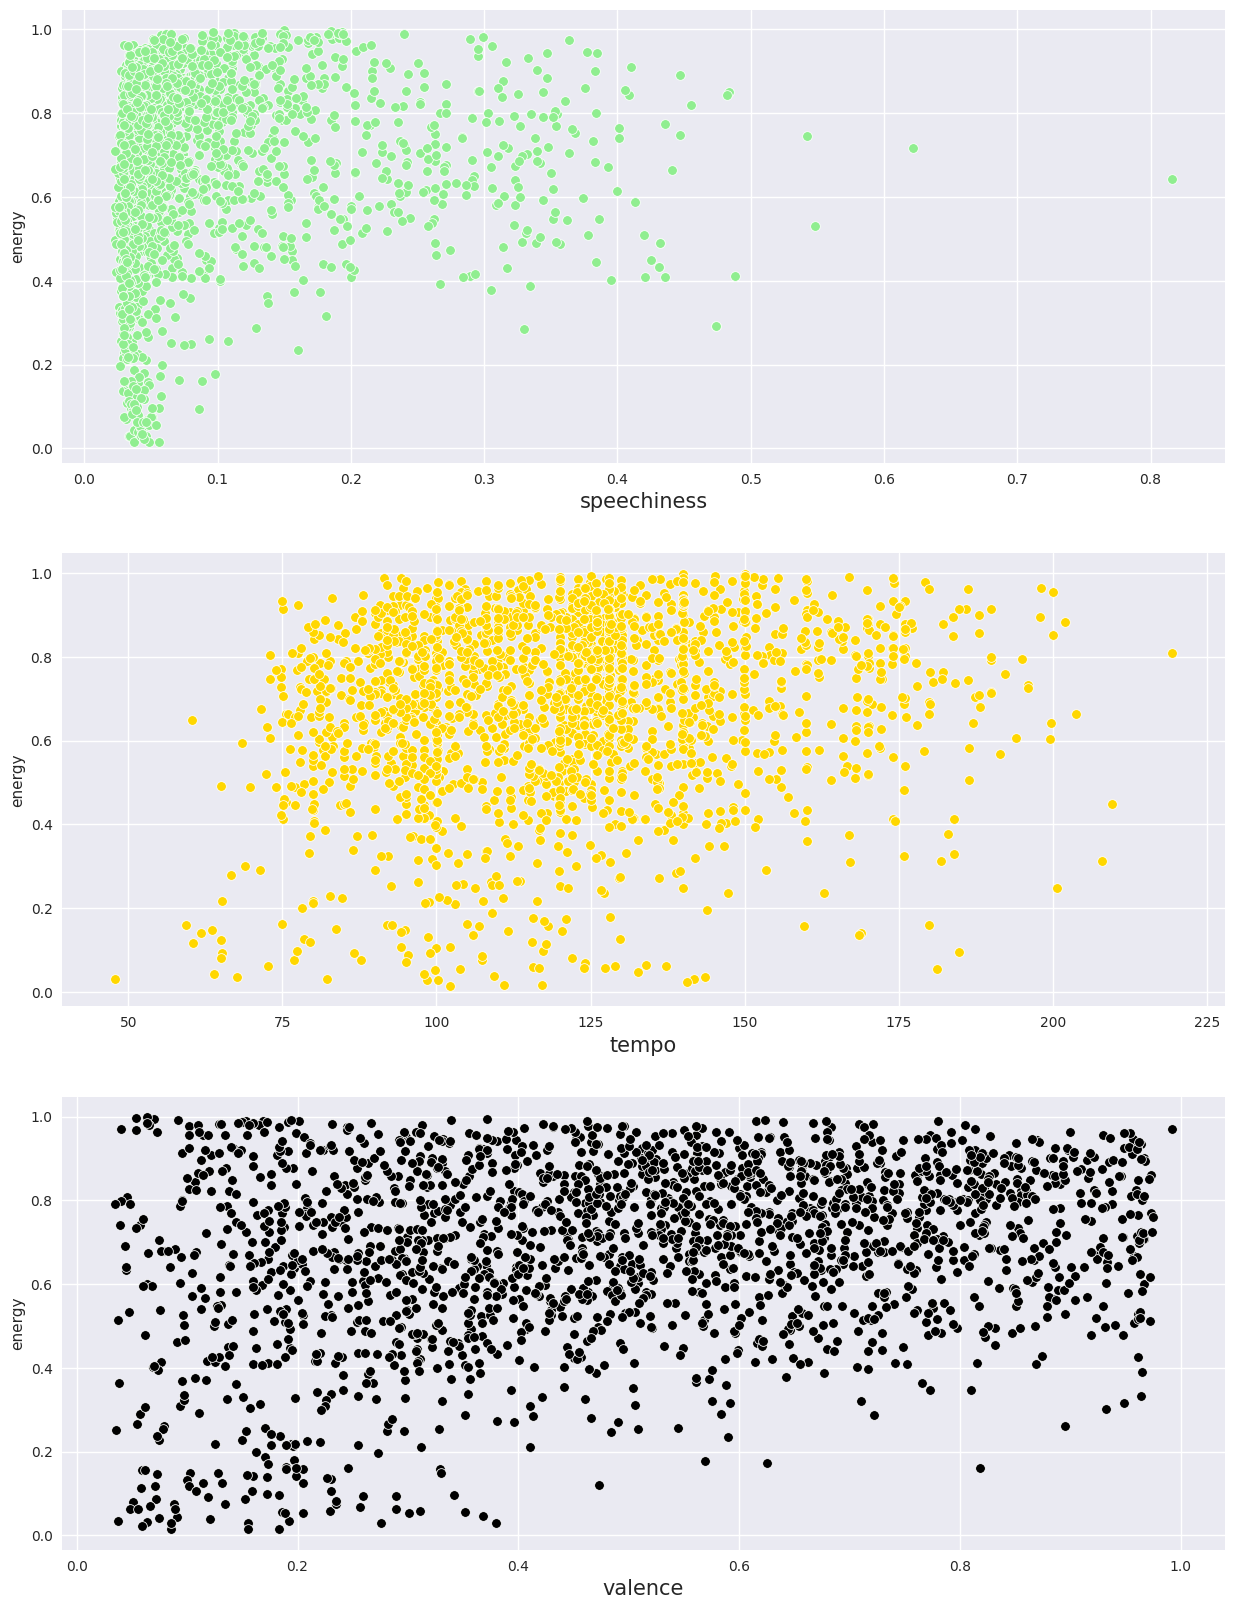

In [36]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,20))

sn.scatterplot(x = df['speechiness'], y = df['energy'], ax=ax[0], color="lightgreen");
ax[0].set_xlabel("speechiness",fontsize=15);

sn.scatterplot(x = df['tempo'], y = df['energy'], ax=ax[1], color="gold");
ax[1].set_xlabel("tempo",fontsize=15);

sn.scatterplot(x = df['valence'], y = df['energy'], ax=ax[2], color="black");
ax[2].set_xlabel("valence",fontsize=15);

----